**Periodic Potential**

$V_{c}(x,y)=-V_{0}exp(-(\alpha_{x} \frac{(x-x_{0})^{2}}{a^{2}} + \alpha_{y} \frac{(y-y_{0})^{2}}{a^{2}}))$

where $V_{0}$ represents the maximum depth of the potential well, $a$ is the length of the unit cell,

$(x_{0}, y_{0})$ are the coordinates of the center of the potential well

------------

In the example, $a = 4$ a.u., $V_{0} = 3 \pi^2 / 2a^2, \alpha_{x}=\alpha_{y}=6.5$, $x_{0}/y_{0}$ is distributed every 4 unit in the range $[-8,8] \times [-8,8]$

$V(x, y) = \sum_{n} -V_{0}exp(-(\alpha_{x} \frac{(x-x_{n})^{2}}{a^{2}} + \alpha_{y} \frac{(y-y_{n})^{2}}{a^{2}}))$

$V(x, y) = \sum_{n} - \frac{3 \pi^2}{32}exp(-(6.5 \frac{(x-x_{n})^{2}}{16} + 6.5  \frac{(y-y_{n})^{2}}{16}))$

To ensure positive, add 1:

$\rightarrow V(x, y) = 1 + \sum_{n} - \frac{3 \pi^2}{32}exp(-(6.5 \frac{(x-x_{n})^{2}}{16} + 6.5  \frac{(y-y_{n})^{2}}{16}))$


$V_{0}' = 15 V_{0} = 15 \times 3\pi ^{2} / 32 \approx 14$
$\rightarrow V(x, y) = 15 + \sum_{n} - 15 * \frac{3 \pi^2}{32}exp(-(6.5 \frac{(x-x_{n})^{2}}{16} + 6.5  \frac{(y-y_{n})^{2}}{16}))$

### Initialisation

In [1]:
from HMC import HMC
import sys
sys.path.append("..")
from MCMC_DZ.MCMC.Statistic_tools import auto_corr_plot, targetDis_step_plot, density_plots, ESS

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import poisson
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Define the parameters.
a = 4.0
V0 = (3 * np.pi**2 / (2 * a**2)) * 15
alpha_x = alpha_y = 6.5

N = 10000 # number of data points

bins = 100 #number of bins (square root of N here)
seed = 12345 #seed

In [3]:
# Define a grid of points.
x = np.linspace(-8, 8, 1000)
y = np.linspace(-8, 8, 1000)
X, Y = np.meshgrid(x, y)

# Define the centers of the potential wells.
centers = [(i, j) for i in range(-6, 7, 4) for j in range(-6, 7, 4)]
xn = np.array(centers)[:,0]
yn = np.array(centers)[:,1]

In [4]:
# Define the potential function.

# def V_unvectorized(x, y, xn, yn, alpha_x=alpha_x, alpha_y=alpha_y):
#     length = xn.shape[0]
#     V_c = []
#     for i in range(length):
#         V_c.append(1-V0 * np.exp(-(alpha_x * (x - xn[i])**2 / a**2 + alpha_y * (y - yn[i])**2 / a**2)))
#     return sum(V_c)

# def V_scaled_unvectorized(x, y, xn, yn, alpha_x=alpha_x, alpha_y=alpha_y):
#     length = xn.shape[0]
#     V_c = []
#     for i in range(length):
#         V_c.append(1-V0 * np.exp(-(alpha_x * (x - xn[i])**2 / a**2 + alpha_y * (y - yn[i])**2 / a**2)))
#     return (sum(V_c)-np.min(sum(V_c)))/(np.max(sum(V_c))-np.min(sum(V_c)))

def V(x, y, xn=xn, yn=yn, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0):
    def generator():
        for xi, yi in zip(xn, yn):
            yield - V0 * np.exp(-(alpha_x * (x - xi)**2 / a**2 + alpha_y * (y - yi)**2 / a**2))
    return sum(generator())+15

def V_scaled(x, y, xn=xn, yn=yn, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0):
    def generator():
        for xi, yi in zip(xn, yn):
            yield 1 - V0 * np.exp(-(alpha_x * (x - xi)**2 / a**2 + alpha_y * (y - yi)**2 / a**2))
    return (sum(generator())-np.min(sum(generator())))/(np.max(sum(generator()))-np.min(sum(generator())))

# def V_normlizing(x, y, xn, yn, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0):
#     x_range, y_range = np.meshgrid(np.linspace(-8, 8, 10000), np.linspace(-8, 8, 10000))
#     V_range = V(x_range, y_range, xn, yn)
#     Vmin = np.min(V_range)
#     Vmax = np.max(V_range)
#     Vxy = V(x,y,xn,yn)
#     return (Vxy-Vmin)/(Vmax-Vmin)

In [5]:
# def V_centers(x, y, start=-6, spacing=4, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0):
    
#     if start > 0:
#         start = -start

#     start = round(start)
#     spacing = round(spacing[0])

#     # Compute the centers
#     centers = [(i, j) for i in range(start, -start+1, spacing) for j in range(start, -start+1, spacing)]
#     xn = np.array(centers)[:,0]
#     yn = np.array(centers)[:,1]
    
#     # Compute the potential
#     return V(x, y, xn, yn, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0)

In [5]:
# Compute the total potential at each point.
Vxy = V(X, Y, xn, yn)

# Getting min/max in the potential
Vmin = np.min(Vxy)
Vmax = np.max(Vxy)

V_normalized = Vxy/np.sum(Vxy)
Z_scaled = (Vxy-Vmin)/(Vmax-Vmin)

In [6]:
def V_scaled1(x, y, xn=xn, yn=yn, alpha_x=alpha_x, alpha_y=alpha_y, a=a, V0=V0):
    def generator():
        for xi, yi in zip(xn, yn):
            yield 1 - V0 * np.exp(-(alpha_x * (x - xi)**2 / a**2 + alpha_y * (y - yi)**2 / a**2))
    Vxy = sum(generator())
    return (Vxy-Vmin)/(Vmax-Vmin)

In [8]:
V_normalized = V_scaled1(X, Y, xn, yn)/np.sum(V_scaled1(X, Y, xn, yn))

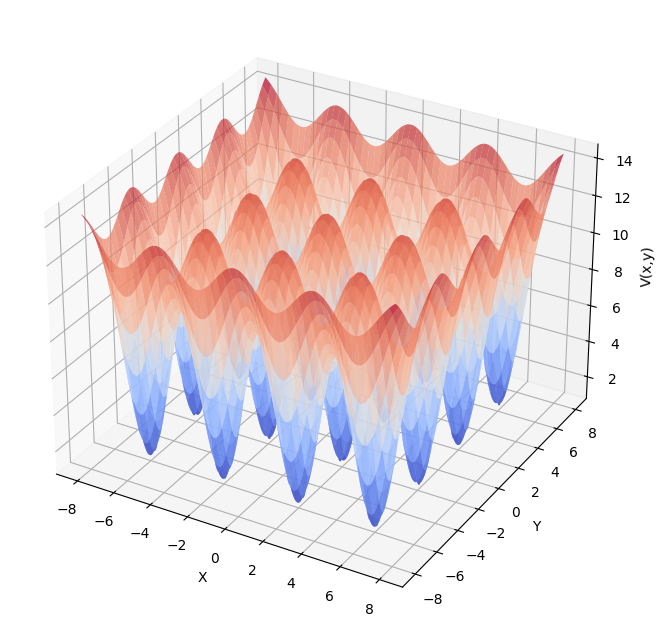

In [6]:
# Plot the potential.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Vxy, alpha=0.7, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V(x,y)')
plt.show()

In [7]:
np.random.seed(seed)

# First, flatten V and create an array of corresponding indices
V_flat = V_normalized.flatten()
indices = np.arange(V_flat.size)

# Generate data indices according to the distribution V_flat
data_indices = np.random.choice(indices, size=N, p=V_flat)

# Convert these indices back to 2D coordinates
data_coordinates = np.unravel_index(data_indices, V_normalized.shape)

# At this point, data_coordinates is a tuple of two arrays, representing the x and y coordinates of the data points
# If you need these as an array of (x, y) pairs, you can use:
# data_points = np.vstack(data_coordinates).T

In [8]:
# for meshgrid X,Y
data = (x[data_coordinates[0]],y[data_coordinates[1]])
data = np.squeeze(data).T

In [ ]:
X_data, Y_data = np.meshgrid(x[data_coordinates[0]],y[data_coordinates[1]])
Z = V_scaled(X_data, Y_data, xn, yn)

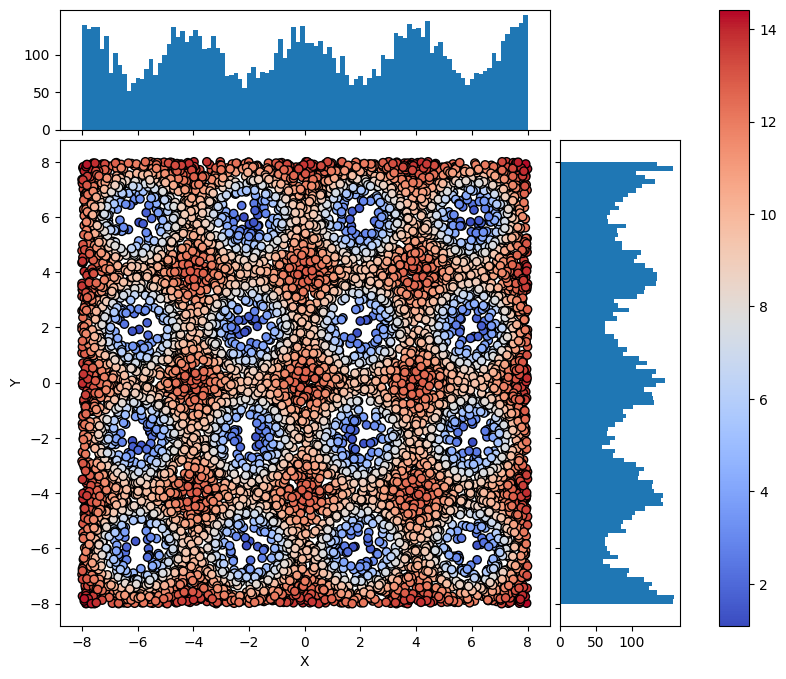

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 8))

# the scatter plot:
scatter_plot = ax.scatter(x[data_coordinates[0]], y[data_coordinates[1]],c=V(x=x[data_coordinates[0]],y=y[data_coordinates[1]],xn=xn,yn=yn), cmap='coolwarm', edgecolor='k')

# Set aspect of the main axes.
# ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
# binwidth = 0.25
# xymax = max(np.max(np.abs(x[data_coordinates[0]])), np.max(np.abs(y[data_coordinates[1]])))
# lim = (int(xymax/binwidth) + 1)*binwidth

# bins_ = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(data[:,0], bins=bins)
ax_histy.hist(data[:,1], bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, N/200, N/100])
ax_histy.set_xticks([0, N/200, N/100])

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.colorbar(scatter_plot,ax=ax)

plt.show()

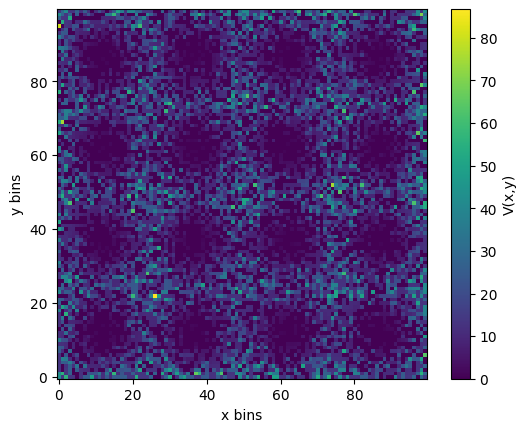

In [10]:
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x[data_coordinates[0]], y[data_coordinates[1]], weights=V(x=x[data_coordinates[0]],y=y[data_coordinates[1]],xn=xn,yn=yn), bins=bins)

# Create the basis of the plot
plt.imshow(heatmap.T, origin='lower', cmap='viridis')
plt.colorbar(label='V(x,y)')
plt.xlabel('x bins')
plt.ylabel('y bins')
plt.show()

##### For comparing different alpha values

In [87]:
Z2 = V(X, Y, xn, yn,alpha_x=6.5,alpha_y=6.5)

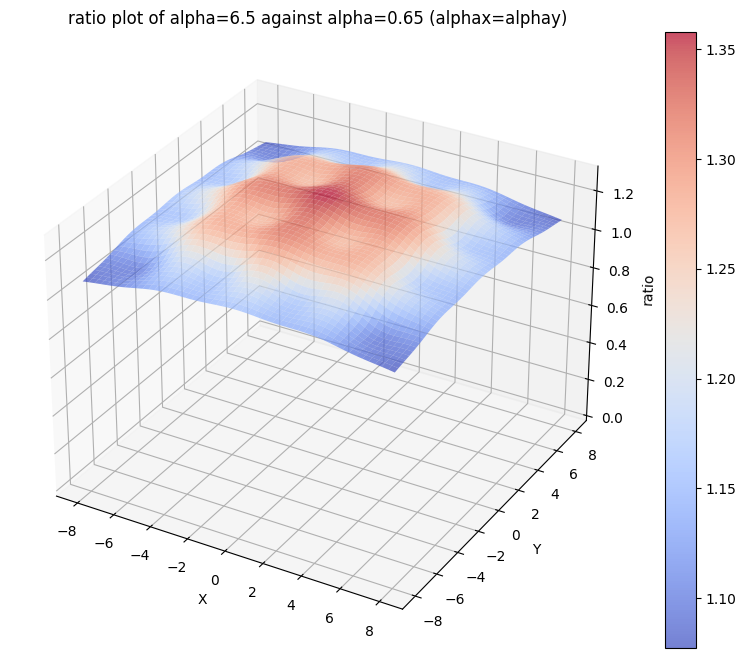

In [90]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z2/Vxy, alpha=0.7, cmap='coolwarm')
ax.set_zlim(0, 1.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('ratio')
ax.set_title('ratio plot of alpha=6.5 against alpha={} (alphax=alphay)'.format(alpha_x))
fig.colorbar(surf)

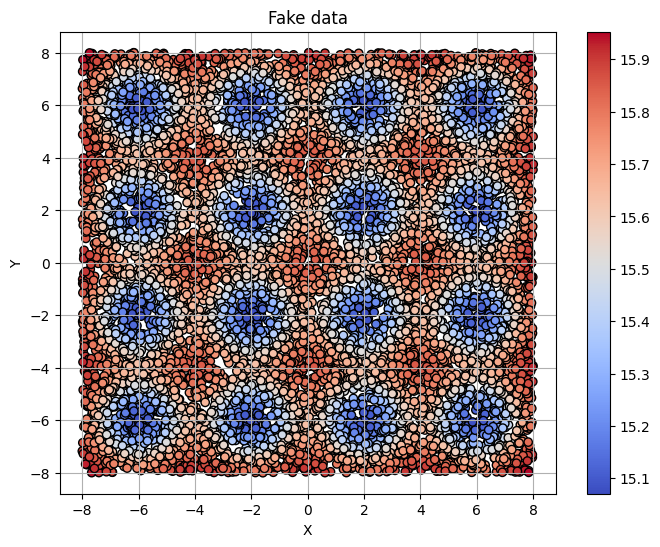

In [8]:
# Create scatter plot of original data points
plt.figure(figsize=(8,6))
plt.scatter(x[data_coordinates[0]], y[data_coordinates[1]], c=V(x=x[data_coordinates[0]],y=y[data_coordinates[1]],xn=xn,yn=yn), cmap='coolwarm', edgecolor='k')
plt.colorbar()  # Display a color bar
plt.title('Fake data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### **Generating the noisy data**

In [11]:
from typing import List


def generate_noisy_data_2d(data, bins=int):
    '''
    Generate data with Poisson flucuations
    
    Arguments
    data [np.ndarra]: initial dataset
    bins: number of bins for the poisson fluctuation
    
    Returns 
    noise_data [float or None]: data with the Poisson noise added
    
    '''
    #set the seed
    np.random.seed(seed)

    n_dimensions = 2
    # first create a numpy histogram
    data_hist, bin_edges = np.histogramdd(data, bins=bins)
    bin_centers = []
    for i in range(n_dimensions):
        bin_centers.append((bin_edges[i][:-1] + bin_edges[i][1:]) / 2.0)

    # Calculate the bin areas (assuming uniform bins)
    bin_areas = np.ones_like(data_hist)
    for i in range(n_dimensions):
        bin_areas *= (bin_edges[i][1:] - bin_edges[i][:-1]).reshape([-1 if j == i else 1 for j in range(n_dimensions)])

    # Calculate expected number of events per bin and add Poisson noise
    x_centers, y_centers = np.meshgrid(bin_centers[0],bin_centers[1])
    V_norm = V(x=x_centers,y=y_centers,xn=xn,yn=yn) / np.sum(V(x=x_centers,y=y_centers,xn=xn,yn=yn))
    expected_values = len(data) * V_norm
    noisy_data_hist = (np.random.poisson(expected_values))

    return  x_centers, y_centers, noisy_data_hist

In [12]:
x_centers, y_centers, noisy_data = generate_noisy_data_2d(data=data,bins=bins)

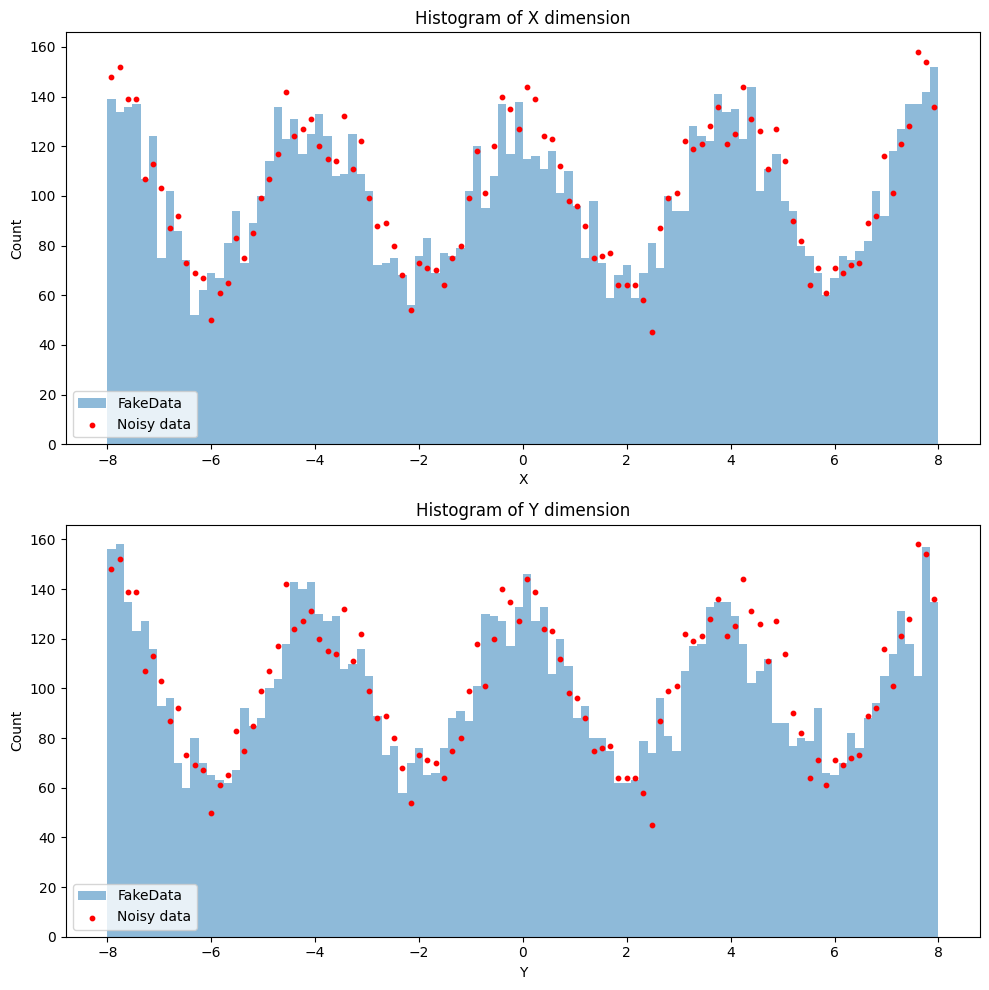

In [13]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the histogram for the x dimension

noisy_counts = np.sum(noisy_data,axis=0)

for i in range(2):
    data_counts, data_edges = np.histogram(data[:,i], bins=bins)
    data_bin_centers = (data_edges[:-1] + data_edges[1:]) / 2.0

    # noisy_counts, noisy_edges = np.histogram(noisy_data[:,i], bins=bins)
    # noisy_bin_centers = (noisy_edges[:-1] + noisy_edges[1:]) / 2.0

    data_bars = axs[i].bar(data_bin_centers, data_counts, alpha=0.5, label='FakeData', width=(data_bin_centers[1] - data_bin_centers[0]))
    noisy_points = axs[i].scatter(data_bin_centers, noisy_counts, color='red', label='Noisy data',s=10)
    
    handles = [data_bars, noisy_points]
    if i == 0:
        axs[i].set_title('Histogram of X dimension')
        axs[i].set_xlabel('X')
        axs[i].set_ylabel('Count')
        axs[i].legend(handles=handles,loc=3)
    if i == 1:
        axs[i].set_title('Histogram of Y dimension')
        axs[i].set_xlabel('Y')
        axs[i].set_ylabel('Count')
        axs[i].legend(handles=handles,loc=3)

# Display the figure
plt.tight_layout()
plt.show()

##### Relationship between number of bins and the value of alpha

In [29]:
def log_likelihood(x, y, mcx, mcy, alphax, alphay, xn=xn, yn=yn):
    lambda_ = V(x, y, xn, yn, alphax, alphay)
    data = V(mcx, mcy, xn, yn, alphax, alphay)
    return -(lambda_ - data + data * np.log(data/lambda_))

In [133]:
X, Y = np.meshgrid(np.arange(0, 2001, 10)[1:], np.linspace(1, 10, 100))

In [138]:
A = np.zeros_like(X)

In [146]:
for index, i in enumerate(X):
    for index1, j in enumerate(i):
        noisy_data1 = generate_noisy_data_2d(data=data,bins=j)
        def log_likelihoods(params):
            alpha_x, alpha_y = params
            return np.sum(log_likelihood(x=data[:,0], y=data[:,1], mcx=noisy_data1[:,0], mcy=noisy_data1[:,1], alphax=alpha_x, alphay=alpha_y))
        A[index,index1] += log_likelihoods([Y[index,index1],Y[index,index1]])

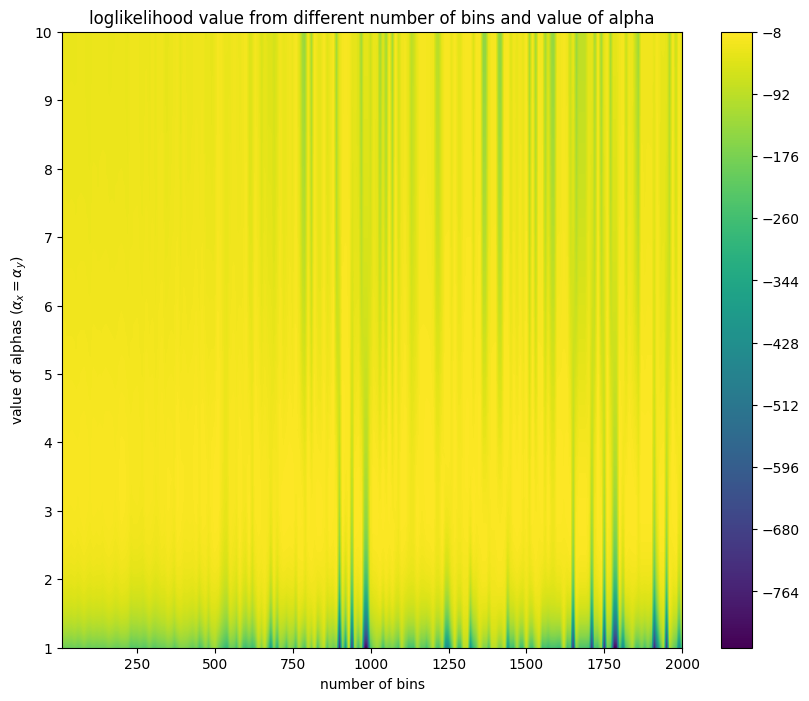

In [153]:
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, A, levels=1000, cmap='viridis')
plt.colorbar()
plt.title('loglikelihood value from different number of bins and value of alpha')
plt.xlabel('number of bins')
plt.ylabel('value of alphas ($\\alpha_{x} = \\alpha_{y}$)')
plt.show()

In [166]:
A1=[]
for i in np.arange(0, 2001, 10)[1:]:
    noisy_data1 = generate_noisy_data_2d(data=data,bins=i)
    def log_likelihoods(params):
        alpha_x, alpha_y = params
        return np.sum(log_likelihood(x=data[:,0], y=data[:,1], mcx=noisy_data1[:,0], mcy=noisy_data1[:,1], alphax=alpha_x, alphay=alpha_y))
    A1.append(log_likelihoods([3.493,3.322]))

Text(0.5, 1.0, 'loglikelihood vs. number of bins for every 10 bins at [3.493,3.322]')

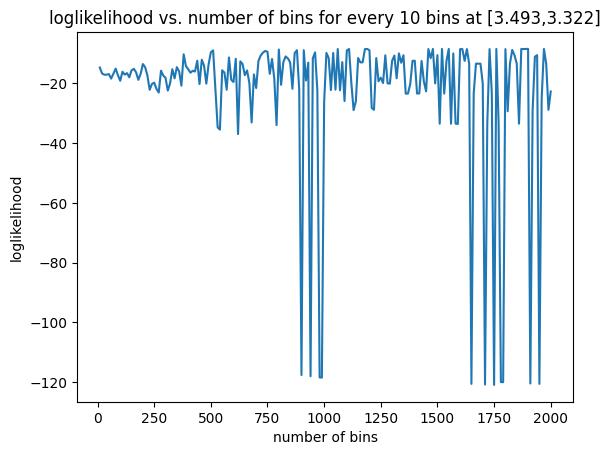

In [167]:
plt.plot(np.arange(0, 2001, 10)[1:],A1)
plt.xlabel('number of bins')
plt.ylabel('loglikelihood')
plt.title('loglikelihood vs. number of bins for every 10 bins at [3.493,3.322]')

### **Getting the likelihood**

loglikelihood of counts in each bin for suggesting parameters $\alpha_{x}, \alpha_{y}$

In [14]:
def log_likelihood(x, y, noisy_data, alphax, alphay, xn=xn, yn=yn):
    '''
    calculating the log likelihood

    Parameters
    ----------
    x, y: bin centers
    xn, yn: centers of wells
    noisy_data: noisy data generated
    alphax,alphay: parameters

    Returns
    -------
    The log of the binned likelihood of inserting parmeters
    '''
    # Computing expected values in each bin
    V1 = V(x, y, xn, yn, alphax, alphay)
    lambda_ = len(data) * (V1 / np.sum(V1))
    data1 = noisy_data
    
    epsilon = 1e-9  # small value to avoid division by zero and log(0)
    lambda_ = np.maximum(lambda_, epsilon)  # avoid zero in lambda_
    data1 = np.maximum(data1, epsilon)  # avoid zero in data1

    return -(lambda_ - data1 + data1 * np.log(data1/lambda_))

def log_likelihoods(params):
    '''
    calculating the total log likelihoods of inserting parameters

    Parameters
    ----------
    params: [list]

    Returns
    -------
    sum of the log likelihood of specified paramaters
    '''
    alpha_x, alpha_y = params
    return np.sum(log_likelihood(x=x_centers, y=y_centers, noisy_data=noisy_data, alphax=alpha_x, alphay=alpha_y))

loglikelihood for individual points

In [92]:
def log_likelihood(x, y, mcx, mcy, alphax, alphay, xn=xn, yn=yn):
    lambda_ = V(x, y, xn, yn, alphax, alphay)
    data = V(mcx, mcy, xn, yn, alphax, alphay)
    return -(lambda_ - data + data * np.log(data/lambda_))

# import math
# def log_likelihood(x, y, mcx, mcy, alphax, alphay, xn=xn, yn=yn):
#     lambda_ = V(x, y, xn, yn, alphax, alphay)
#     data = V(mcx, mcy, xn, yn, alphax, alphay)
#     return -lambda_ + data * np.log(lambda_) - np.log(math.factorial(data))

def log_likelihoods(params):
    alpha_x, alpha_y = params
    return np.sum(log_likelihood(x=data[:,0], y=data[:,1], mcx=noisy_data[:,0], mcy=noisy_data[:,1], alphax=alpha_x, alphay=alpha_y))

### HMC fitting

In [15]:
def dfdx(mu):
    '''
    Forward differencing scheme
    '''
    epsilon = 0.01
    n_dims = 1
    n_comp = 1
    mu = np.array(mu)
    delta_theta = []
    res_mu_plus = []
    for i in range(mu.shape[0]):
        E_plus = np.zeros(n_dims*n_comp)
        E_plus += [(epsilon if j == i else 0) for j in range(n_dims*n_comp)]
        res_mu_plus.append(E_plus)

    for i in range(n_dims*n_comp):
        delta_thetai = (log_likelihoods(mu+res_mu_plus[i]) - log_likelihoods(mu))/(epsilon)
        delta_theta.append(delta_thetai)
        
    return delta_theta

In [16]:
def U(theta: List[np.longdouble]) -> np.longdouble:
    '''
    the potential energy function: 
    U(theta) = -log(probability distribution of theta)
    '''
    return - log_likelihoods(theta)

def grad_U(theta: List[np.longdouble]) -> np.longdouble:
    '''
    the derivative of the potential energy function
    dU/dmu
    '''
    DRho = dfdx(theta)
    Rho = - log_likelihoods(theta)
    return np.array([dRho/Rho for dRho in DRho])

In [104]:
thetas, theta_accept, theta_reject = HMC(epoch=2000, L=5, epsilon=0.1, U=U, grad_U=grad_U, current_theta=np.array([5,5]))

In [ ]:
thetas

In [97]:
round(len(thetas)*0.9)

1800

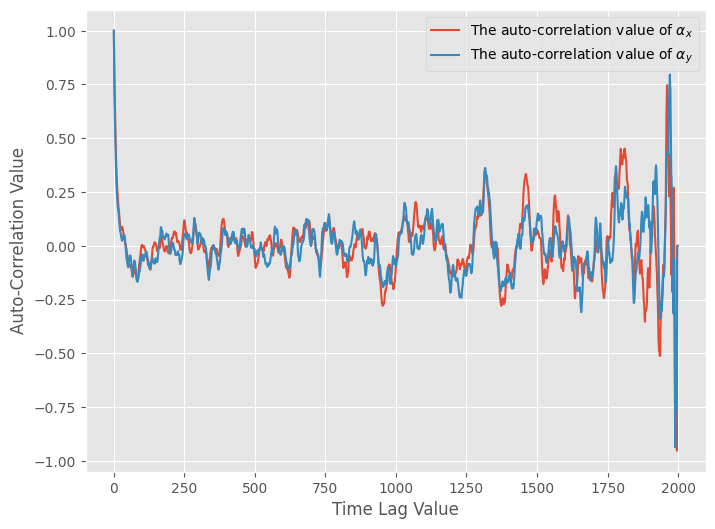

In [105]:
auto_corr_plot(thetas, plot_nth_theta=[0,1],theta_index=['$\\alpha_{x}$','$\\alpha_{y}$'],max_time_lag=round(len(thetas)),figsize=[8,6])

In [85]:
Z1=[]
for i in range(len(theta_accept)):
    Z1.append(log_likelihoods([theta_accept[i][0],theta_accept[i][1]]))

In [106]:
print('acceptance rate =',len(theta_accept)/(len(theta_accept)+len(theta_reject)))

acceptance rate = 0.41


In [87]:
theta_accept

[array([5.29529536, 5.80291401]),
 array([5.92084101, 5.65732698]),
 array([5.88275671, 6.08178899]),
 array([6.37397086, 6.07841058]),
 array([6.61324659, 6.22248608]),
 array([7.15754741, 6.55020018]),
 array([6.32333563, 6.14323792]),
 array([6.4810491 , 6.72737814]),
 array([6.25479793, 6.62401804]),
 array([6.46936069, 6.57540343]),
 array([6.43264081, 6.18098614]),
 array([6.17701247, 6.28619163]),
 array([6.02529742, 6.1233678 ]),
 array([6.36158037, 6.5862737 ]),
 array([6.84919709, 6.85893434]),
 array([6.65503655, 6.14538356]),
 array([7.08637158, 6.79558074]),
 array([6.47881321, 6.89315341]),
 array([6.80034152, 6.76650639]),
 array([7.08278   , 6.84954635]),
 array([6.62716203, 6.84925672]),
 array([6.71255765, 6.73371214]),
 array([6.57040218, 6.84840336]),
 array([7.07757674, 6.50543173]),
 array([6.63800289, 7.07124832]),
 array([6.68261811, 6.30255165]),
 array([6.65556415, 6.79554403]),
 array([6.41191794, 6.06494914]),
 array([6.76963011, 6.29032804]),
 array([6.1087

quantiles

In [66]:
# percentage
quant = 0.05

In [88]:
ax = np.array(theta_accept)[:,0]
ay = np.array(theta_accept)[:,1]
axx = np.array(thetas)[:,0]
ayy = np.array(thetas)[:,1]

In [68]:
np.sort(ay)[round(len(theta_accept)*quant)]

5.9677781277984385

creat a grid to create the parameter space

In [24]:
alphax = np.linspace(4, 10, 100)
alphay = np.linspace(4, 10, 100)
alphaX, alphaY = np.meshgrid(alphax, alphay)

calculate the log likelihood for the stated grid

In [25]:
Z100=np.zeros([100,100])
for i in range(100):
    for j in range(100):
        Z100[i][j] += log_likelihoods([alphaX[i][j],alphaY[i][j]])

contour plot for plotting the trace of the generated points

and trace plots for each parameter

In [26]:
#Define the level in the contour plot
levels = np.percentile(Z100, np.array([0.68, 0.95, 0.99]) * 100)

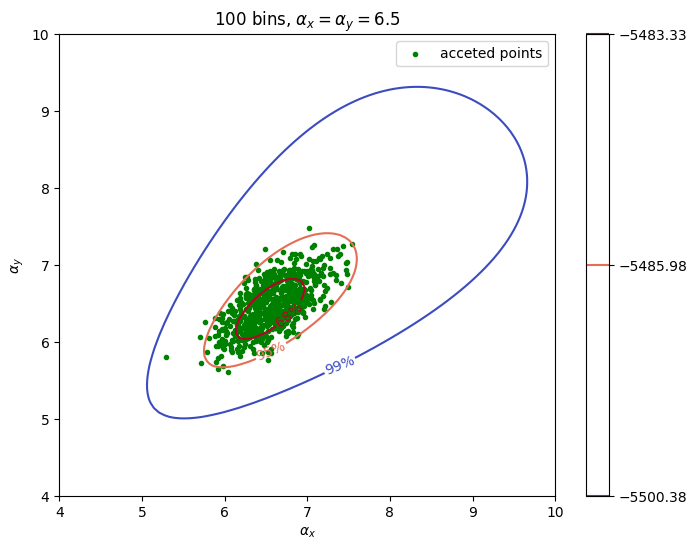

In [94]:
CS = plt.contour(alphaX,alphaY,Z100,levels=levels, cmap='coolwarm')

#Label contours with arbitrary strings using a dictionary
fmt = {}
strs = ['99%','95%','68%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
plt.clabel(CS, CS.levels,inline=True, fmt=fmt, fontsize=10)

plt.colorbar()
plt.xlabel('$\\alpha_{x}$')
plt.ylabel('$\\alpha_{y}$')
plt.title('100 bins, $\\alpha_{x}=\\alpha_{y}=6.5$')
plt.scatter(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],marker='.',color='green',label='acceted points')
# plt.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],'--',color='orange', label='trace')
plt.legend()

Text(0, 0.5, 'value of $\\alpha_{x}$')

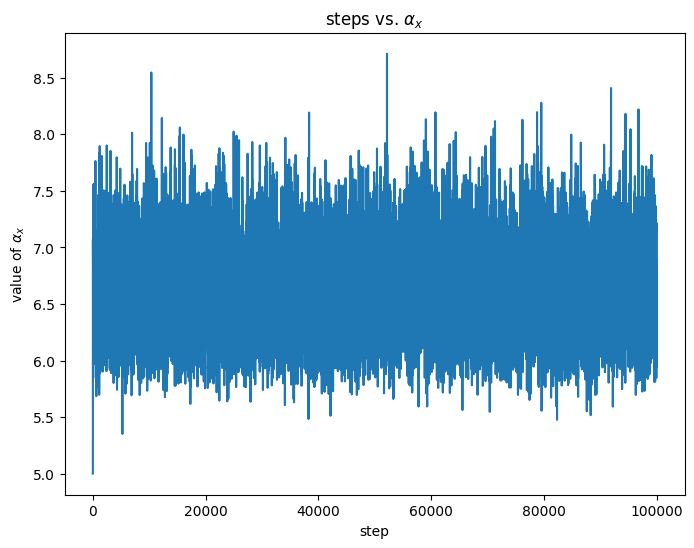

In [70]:
plt.plot(np.arange(len(thetas)),axx)
plt.title('steps vs. $\\alpha_{x}$')
plt.xlabel('step')
plt.ylabel('value of $\\alpha_{x}$')

Text(0, 0.5, 'value of $\\alpha_{y}$')

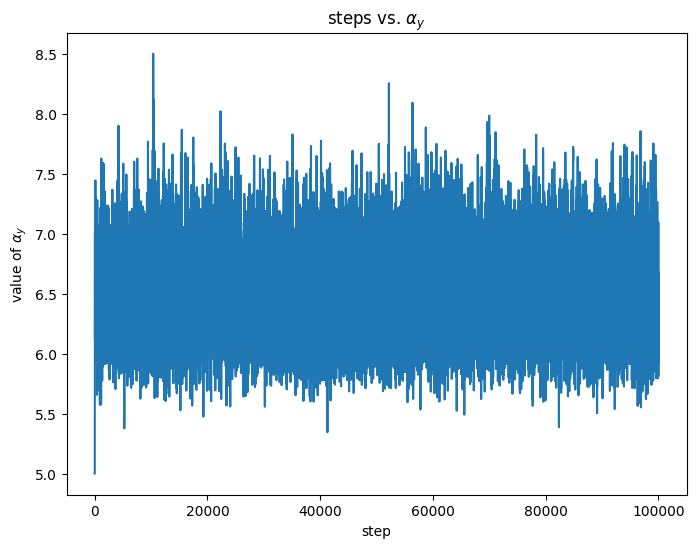

In [71]:
plt.plot(np.arange(len(thetas)),ayy)
plt.title('steps vs. $\\alpha_{y}$')
plt.xlabel('step')
plt.ylabel('value of $\\alpha_{y}$')

3d one

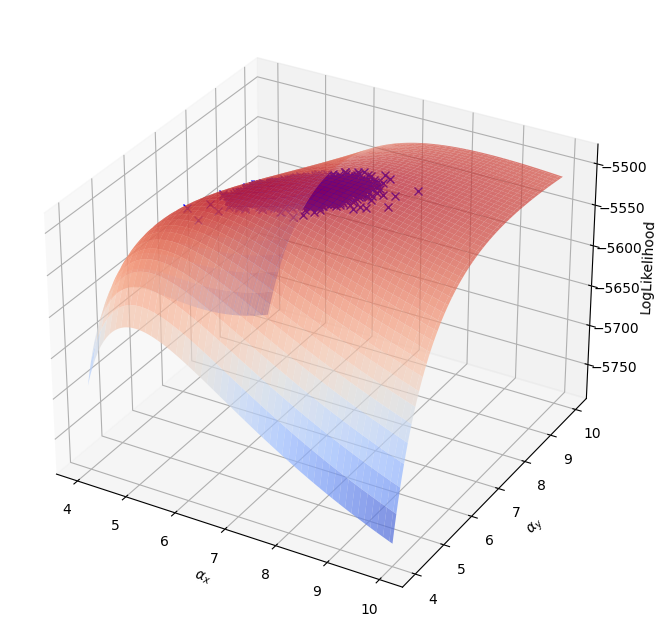

In [51]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
ax = fig.add_subplot(projection='3d')

ax.plot_surface(alphaX,alphaY,Z100,alpha=0.7,cmap='coolwarm',label='logLikelihood')

ax.set_xlabel('$\\alpha_{x}$')
ax.set_ylabel('$\\alpha_{y}$')
ax.set_zlabel('LogLikelihood')

ax.plot(np.array(theta_accept)[:,0],np.array(theta_accept)[:,1],Z1,'x',color='blue',label='Accepted points')

plt.show()

In [72]:
ESS(theta_accept)

array([7088.22067392, 7206.25749774])

steps vs. loglikeli

Text(0, 0.5, 'loglikelihood')

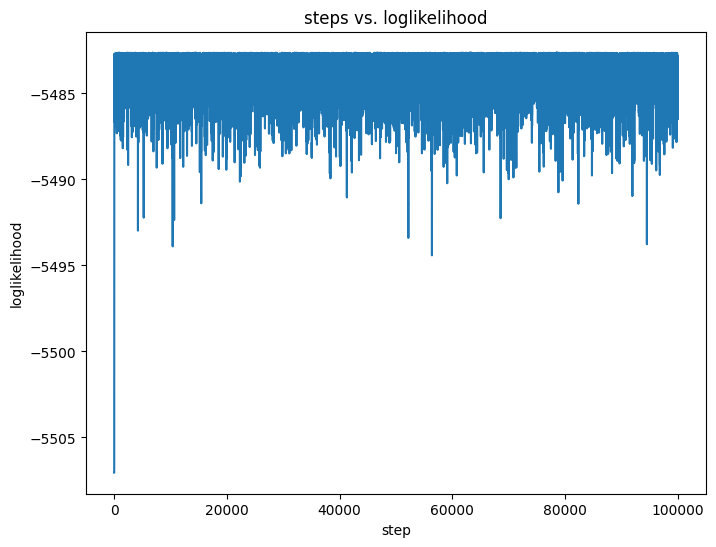

In [73]:
loglikeli = []
for i in thetas:
    loglikeli.append(log_likelihoods(i))
plt.plot(np.arange(len(thetas)),loglikeli)
plt.title('steps vs. loglikelihood')
plt.xlabel('step')
plt.ylabel('loglikelihood')

Acceptance rate

In [102]:
len(theta_accept)/(len(theta_accept)+len(theta_reject))

0.363

Density plot

\\icnas3.cc.ic.ac.uk\jq822\downloads\MResMCMC2023\06.22\MResMCMC2023-main\HMC\..\MCMC_DZ\MCMC\Statistic_tools.py:232: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


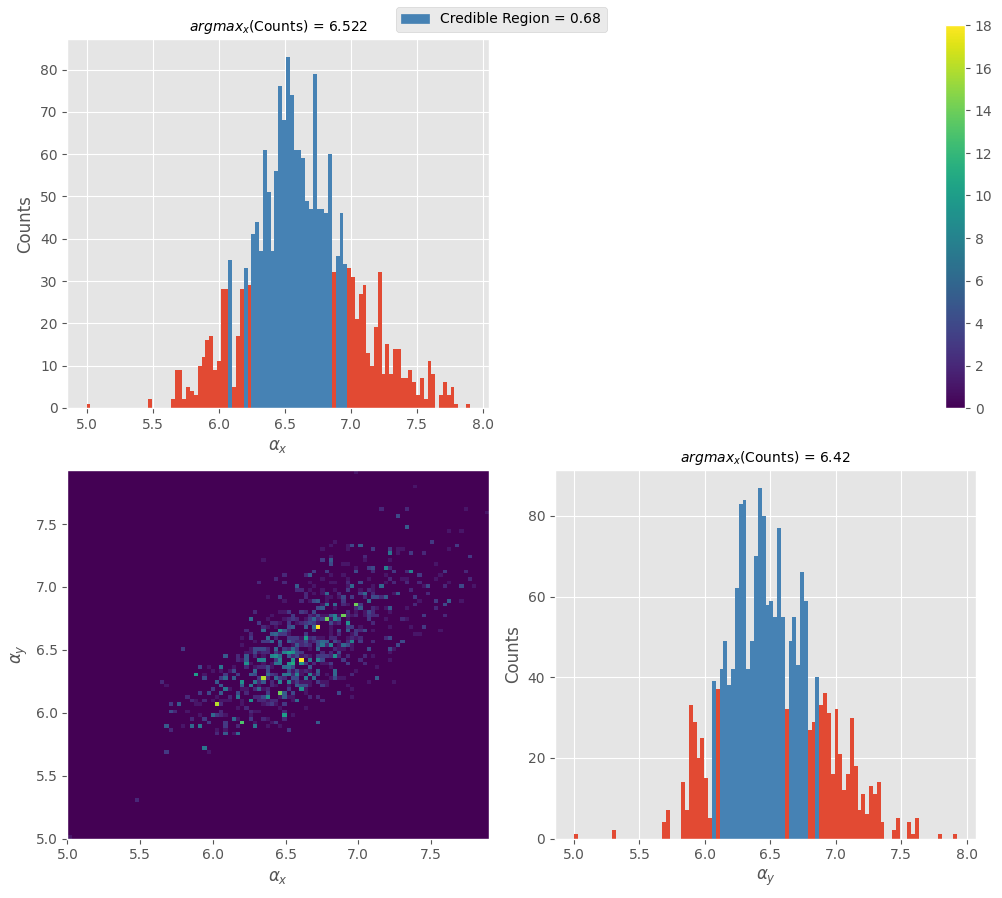

{0: [array([6.50742615, 6.53641511]),
  array([6.7103489 , 6.73933786]),
  array([6.44944822, 6.47843718]),
  array([6.53641511, 6.56540408]),
  array([6.47843718, 6.50742615]),
  array([6.33349236, 6.36248133]),
  array([6.56540408, 6.59439304]),
  array([6.59439304, 6.62338201]),
  array([6.82630476, 6.85529372]),
  array([6.62338201, 6.65237097]),
  array([6.42045925, 6.44944822]),
  array([6.36248133, 6.39147029]),
  array([6.65237097, 6.68135993]),
  array([6.68135993, 6.7103489 ]),
  array([6.73933786, 6.76832683]),
  array([6.76832683, 6.79731579]),
  array([6.79731579, 6.82630476]),
  array([6.91327165, 6.94226061]),
  array([6.27551443, 6.3045034 ]),
  array([6.24652547, 6.27551443]),
  array([6.3045034 , 6.33349236]),
  array([6.39147029, 6.42045925]),
  array([6.88428268, 6.91327165]),
  array([6.07259168, 6.10158065]),
  array([6.94226061, 6.97124958]),
  array([6.18854754, 6.2175365 ])],
 1: [array([6.40567034, 6.43495514]),
  array([6.28853115, 6.31781595]),
  array([6.25

In [107]:
density_plots(Thetas=np.array(thetas), plot_axis=[], bins=100, burn_in=0, cr_1D=0.68, axis_name=['$\\alpha_{x}$','$\\alpha_{y}$'])

##### comparing different number of bins

Text(0.5, 1.0, 'loglikelihood ratio plot of bins=15 against bins=30')

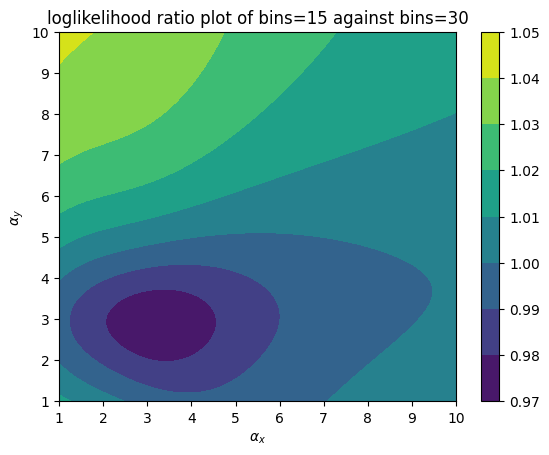

In [39]:
plt.contourf(alphaX,alphaY,Z15/Z30)
plt.colorbar()
plt.xlabel('$\\alpha_{x}$')
plt.ylabel('$\\alpha_{y}$')
plt.title('loglikelihood ratio plot of bins=15 against bins=30')

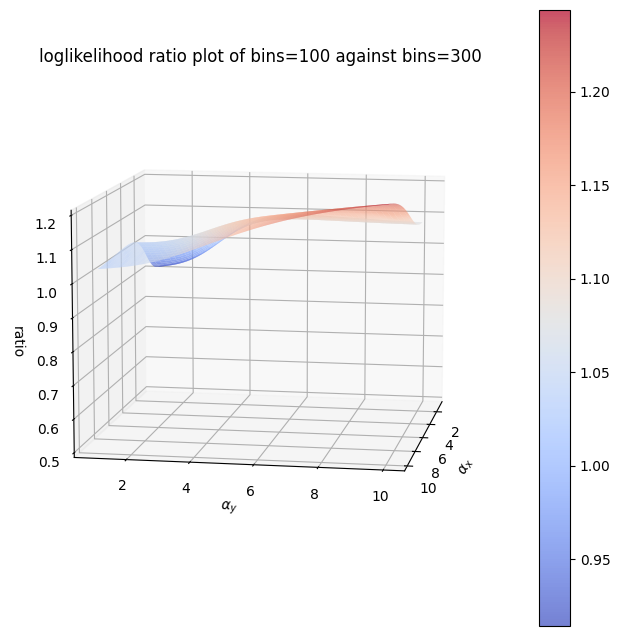

In [48]:
fig = plt.figure(figsize=(8, 8), facecolor="white")
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(alphaX,alphaY,Z100/Z300,alpha=0.7,cmap='coolwarm',label='logLikelihood')
ax.set_zlim(0.5,1.2)
ax.view_init(10, 10)

ax.set_xlabel('$\\alpha_{x}$')
ax.set_ylabel('$\\alpha_{y}$')
ax.set_zlabel('ratio')
ax.set_title('loglikelihood ratio plot of bins=100 against bins=300')
fig.colorbar(surf)

### Adapting MHMC

Initialiase

In [136]:
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
from MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions import UniformProposalDistribution,GaussianProposalDistribution
import MCMC_DZ.MCMC.Visualization_tools as Vts

In [177]:
#setting hyperparameters for MHMC
steps = 100000
theta0 = [5,5] #start

In [166]:
#initialiase the proposal function

#standard deviation for the Gaussian proposal function
sd = 1.0

Prop_G = GaussianProposalDistribution(sd=sd, Dim=2, seed=seed)

In [144]:
MHMC_2DPP = MHMC(rho=log_likelihoods, log_likelihood=True, seed=seed)

Getting result

In [178]:
Res_G_2DPP = MHMC_2DPP.generate(
    theta0=theta0,
    qProb=Prop_G.qProb,
    qSamp=Prop_G.qSample,
    steps=steps,
    OutputRunTime=100,
    MaxTime=600
)

Acceptance Rate

In [179]:
Res_G_2DPP['Acceptance_Rate']

0.13069

logLikelihood vs. steps

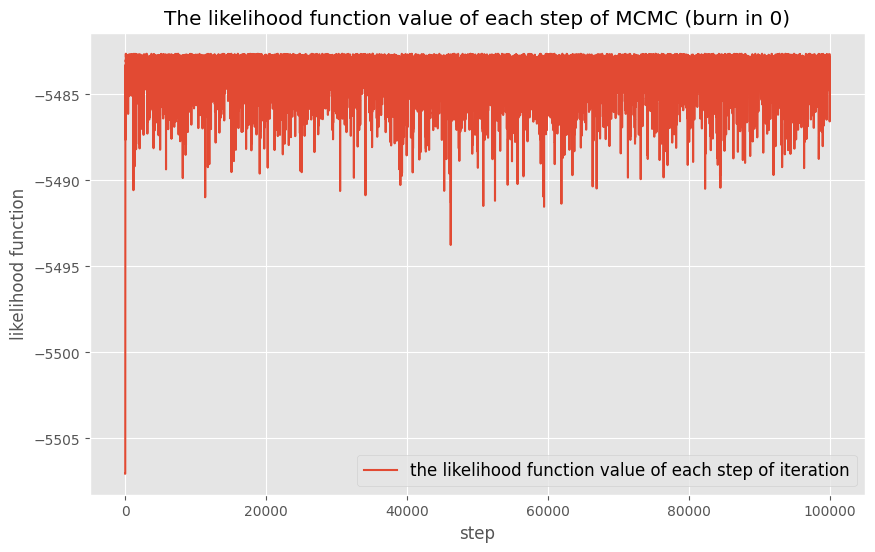

In [180]:
Vts.targetDis_step_plot(Thetas=Res_G_2DPP["Thetas"], rho=log_likelihoods, target_type="likelihood function", burn_in=0, figsize=(10,6))

Autocorrelation

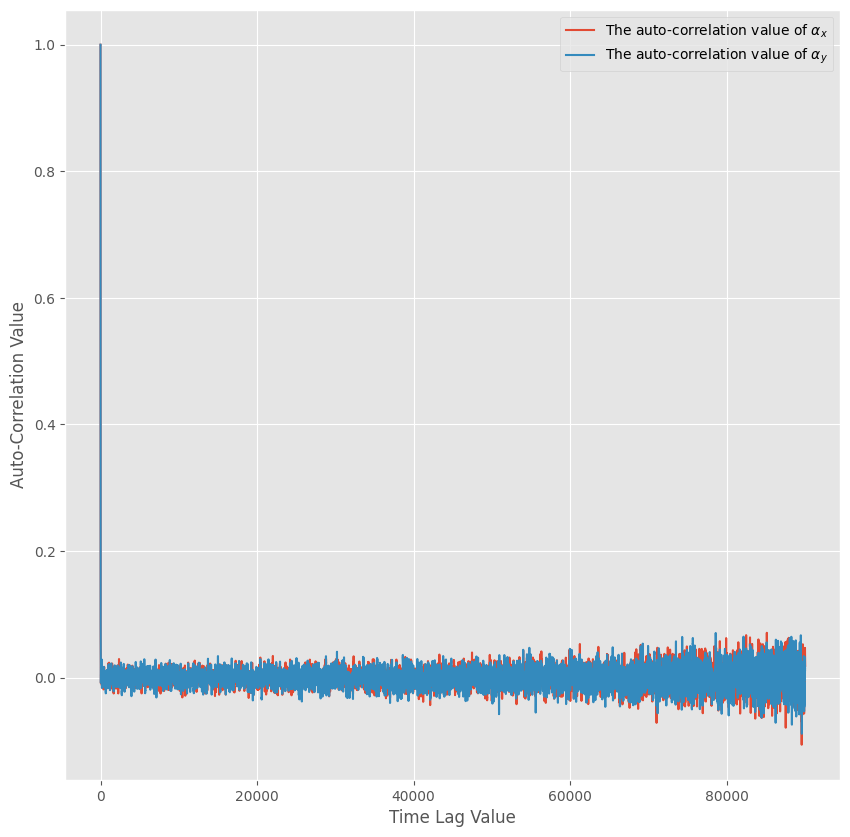

In [186]:
Vts.auto_corr_plot(Res_G_2DPP["Thetas"], [0,1], ["$\\alpha_{x}$", "$\\alpha_{y}$"], 90000)

Trace plot

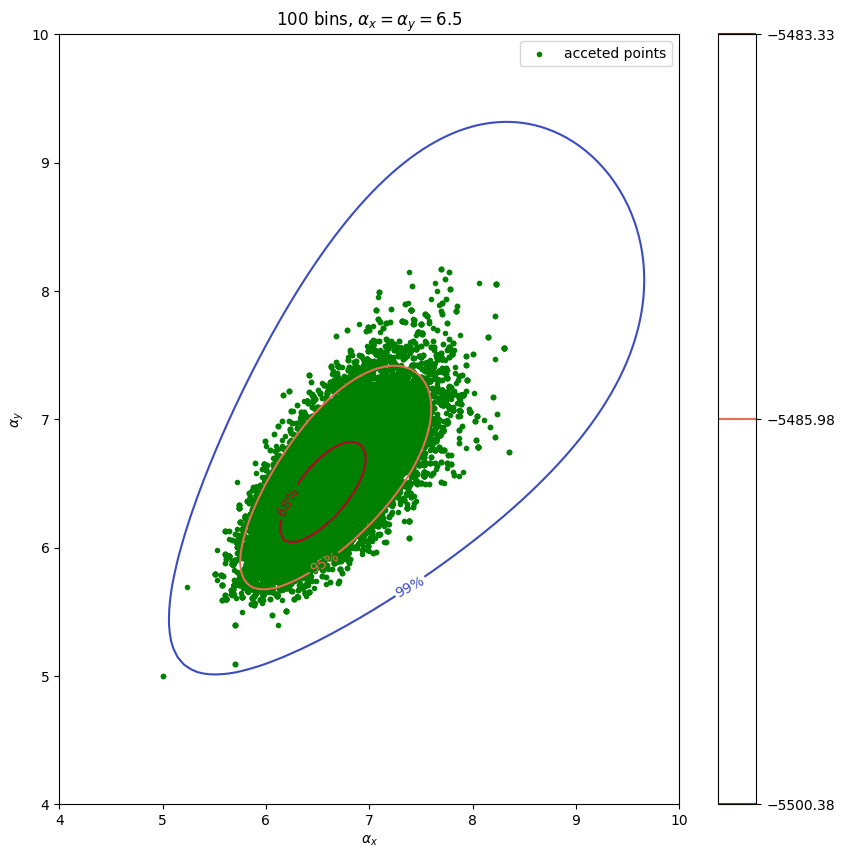

In [182]:
CS = plt.contour(alphaX,alphaY,Z100,levels=levels, cmap='coolwarm')

#Label contours with arbitrary strings using a dictionary
fmt = {}
strs = ['99%','95%','68%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
plt.clabel(CS, CS.levels,inline=True, fmt=fmt, fontsize=10)

plt.colorbar()
plt.xlabel('$\\alpha_{x}$')
plt.ylabel('$\\alpha_{y}$')
plt.title('100 bins, $\\alpha_{x}=\\alpha_{y}=6.5$')
plt.scatter(Res_G_2DPP["Thetas"][:,0],Res_G_2DPP["Thetas"][:,1],marker='.',color='green',label='acceted points')
plt.legend()

Text(0, 0.5, 'value of $\\alpha_{x}$')

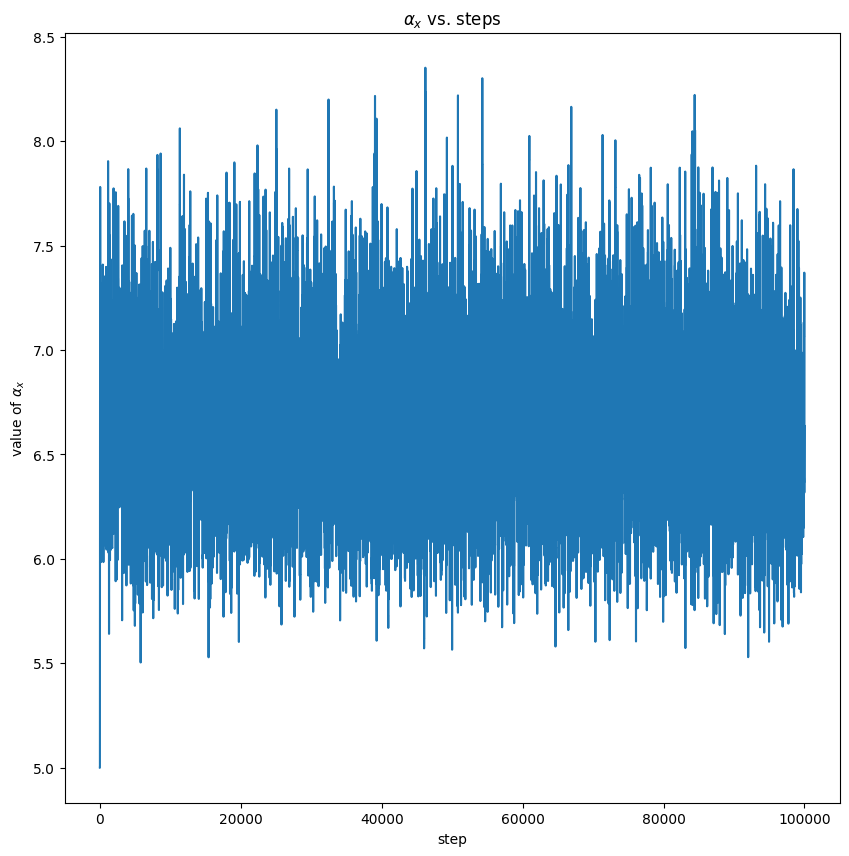

In [183]:
plt.plot(np.arange(len(Res_G_2DPP["Thetas"][:,0])),Res_G_2DPP["Thetas"][:,0])
plt.title('$\\alpha_{x}$ vs. steps')
plt.xlabel('step')
plt.ylabel('value of $\\alpha_{x}$')

Text(0, 0.5, 'value of $\\alpha_{y}$')

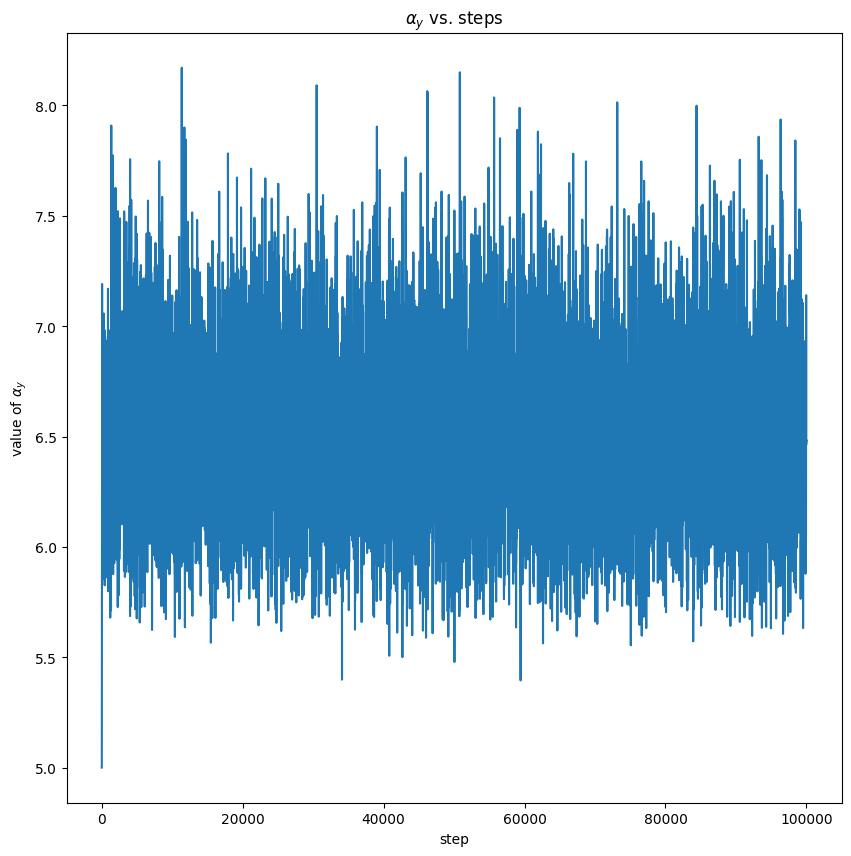

In [184]:
plt.plot(np.arange(len(Res_G_2DPP["Thetas"][:,1])),Res_G_2DPP["Thetas"][:,1])
plt.title('$\\alpha_{y}$ vs. steps')
plt.xlabel('step')
plt.ylabel('value of $\\alpha_{y}$')

Density plot

\\icnas3.cc.ic.ac.uk\jq822\downloads\MResMCMC2023\06.22\MResMCMC2023-main\HMC\..\MCMC_DZ\MCMC\Visualization_tools.py:232: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


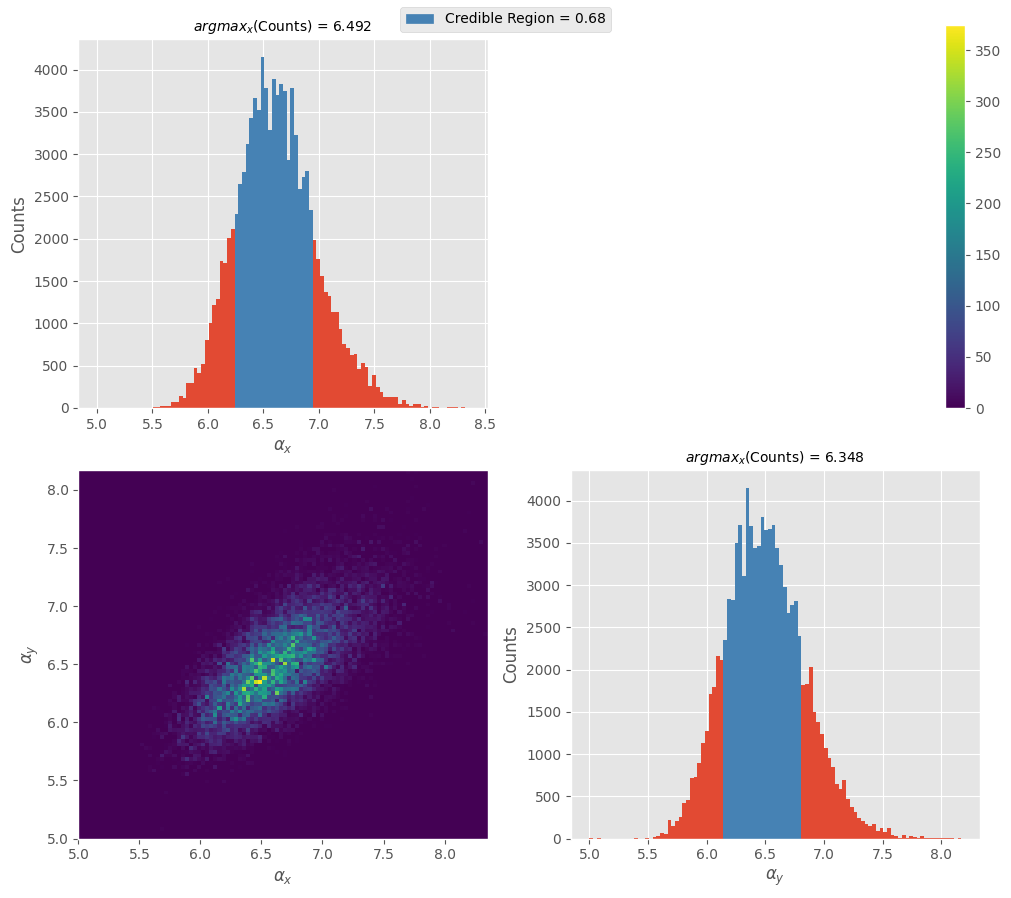

{0: [array([6.4749481 , 6.50846965]),
  array([6.57551275, 6.60903429]),
  array([6.64255584, 6.67607739]),
  array([6.50846965, 6.5419912 ]),
  array([6.74312048, 6.77664203]),
  array([6.67607739, 6.70959894]),
  array([6.60903429, 6.64255584]),
  array([6.40790501, 6.44142655]),
  array([6.44142655, 6.4749481 ]),
  array([6.37438346, 6.40790501]),
  array([6.5419912 , 6.57551275]),
  array([6.77664203, 6.81016358]),
  array([6.34086191, 6.37438346]),
  array([6.70959894, 6.74312048]),
  array([6.87720668, 6.91072822]),
  array([6.30734036, 6.34086191]),
  array([6.84368513, 6.87720668]),
  array([6.27381882, 6.30734036]),
  array([6.81016358, 6.84368513]),
  array([6.91072822, 6.94424977]),
  array([6.24029727, 6.27381882])],
 1: [array([6.33176667, 6.3634754 ]),
  array([6.45860159, 6.49031032]),
  array([6.26834921, 6.30005794]),
  array([6.55372778, 6.58543651]),
  array([6.3634754 , 6.39518413]),
  array([6.52201905, 6.55372778]),
  array([6.49031032, 6.52201905]),
  array([6.23

In [185]:
Vts.density_plots(
        Res_G_2DPP["Thetas"], 
        bins=100,
        burn_in=0,
        plot_axis=[0, 1],
        axis_name=["$\\alpha_{x}$", "$\\alpha_{y}$"],
        cr_1D=0.68
    )